--- 
Project for the course in Microeconometrics / OSE Data Science | Summer 2021, M.Sc. Economics, Bonn University | [Jonathan Willnow](https://github.com/JonathanWillnow)


# Replication of Dreher et al. (2021): Aid, China, and Growth: Evidence from a New Global Development Finance Dataset  <a class="tocSkip">   
    
    
---
      

The aim of this notebook is to replicate the following paper:

> Dreher et al. (2021): Aid, China, and Growth: Evidence from a New Global Development Finance Dataset. American Economic Journal: Economic Policy, vol. 13(2), may 2021 (pp. 135-74).



##### Downloading and viewing this notebook:

* The best way to view this notebook is by downloading it and the repository it is located in from [GitHub](https://github.com/OpenSourceEconomics/ose-data-science-course-project-JonathanWillnow). Other viewing options like _MyBinder_ or _NBViewer_ may have issues with displaying images or coloring of certain parts (missing images can be viewed in the folder [files](https://github.com/OpenSourceEconomics/ose-data-science-course-project-JonathanWillnow) on GitHub).


* The original paper, as well as the data and code provided by the authors can be accessed [here](https://www.aeaweb.org/articles?id=10.1257/pol.20180631).

##### Information about replication and individual contributions:

* For the sake of readability and comprehensibility, I mostly adopt the structure of this notebook to the original structure of the paper. This enables readers to easily follow the notebook and compare it to the paper. The tables and figures of this notebook are named and labeled as they appear in Dreher et. al (2021)


* As the replication of the paper progresses, I keep adding independently extensions (or deviate from the methodology of the authors). In order to clearly delineate this sections from the replication, all these sections are indicated as **extensions**.




---
# Table of Contents
---

 1. [Introduction](#introduction)
 2. [The Tracking Underreported Financial Flows (TUFF) methodology](#section2)
 3. [Descriptive Statistics & Allocation of Chinese Development Finance](#section3)
   * 3.1 [The Distribution of Project Types](#section3.1)
   * 3.2 [Sectoral Distribution](#section3.2)  
   *  3.3 [Finance Form of Projects](#section3.3)  
   *  3.4 [Cross-country Distribution of Chinese Development Finance](#section3.4)  
   *  3.5 [Factors that determined Allocation of Chinese Development Finance](#section3.5)  
       *  3.5.1 [Extension - Descriptive Plots](#section3.5.1)  
       *  3.5.2 [Physical Project Inputs](#section3.5.2)  
       *  3.5.3 [Foreign Exchange Reserves](#section3.5.3)
   *  3.6 [Mixed Effect Models](#section3.6) 
 4. [Identification](#section4)
 5. [Empirical Strategy](#section5)
    *  5.1 [IV Strategy](#section5.1)
    *  5.2 [Checking Parallel Trends Assumption](#section5.2)
 6. [Does Chinese Development Finance Promote Growth?](#section6)
    *  6.1 [Main Results](#section5.1)
    *  6.2 [Extension - Visual Representation of Results](#section6.2)
    *  6.3 [ Extension - Checking Instrument Validity](#section6.3)
    *  6.4 [Timing of the Growth Effects](#section6.4)
    *  6.5 [Robustness Checks](#section6.5)
 7. [Conclusion](#section7)
 8. [References and Literature](#section8)







### Library imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib.pyplot as plt
import geopandas 
import linearmodels as lm
import itertools as tools
import scipy.stats as scipy
from IPython.display import HTML

In [2]:
from auxiliary.auxiliary_preparations import *
from auxiliary.auxiliary_plots import *
from auxiliary.auxiliary_regressions import *
from auxiliary.auxiliary_methods import *

---
# 1. Introduction <a name="introduction"></a>
---

The Belt and Road Initiative (BRI), better known as The "new silk road initiative" is just one of many instances of China´s overseas activities of financing development, especially known to the europeans. Other projects, mostly infrastructure projects (by transaction value), link China within Asia and with the African continent. This role of China as significant donor raises strong opinions, but the debate was based on only little facts since most of the details are not officially reported. The paper at hand uses the Tracking Underreported Financial Flows (TUFF) methodology to introduce a new dataset that provides the needed evidentiary foundations that was needed for this issue.

Dreher et. al adresses the following questions: 

* What determines the allocation of Chinese development finance?
* Does Chinas financial development finance led to economic growth?
* Does Chinas finance undermine the effectivness of western development finance?

In this notebook, I will focus on the first two raised questions by replicating the work of Dreher et al. (2021) and adding extensions.

One might argue that Chinese development aid may not be different than western development aid. It might trigger growth via the same variables that have been identified by previous aid- and development literature, namely increasing pyshical investment, human capital accumulation, consumption or an increase in the performance of firms. Others, especially critics of Chinas increasing role for the world have other beliefs. A frequently used argument is that excessive amounts of Chinese development finance deters foreign investment and host countries might experience foreign exchange shortages which constrains growth in exports. 

To provide an answer to this question on whether and how Chinese development finance affects economic growth, instrumental vriabales are employed that make use of the year-to-year changes in the supply of Chinese development finance (which will be introduced) in tandem with cross-sectional variation which is determined by the probability that countries receive such funding.

As stated, the structure of the notebook mostly follows the paper. Following this introduction, I will introduce the reader to the _Tracking Underreported Financial Flows (TUFF) methodology_  which was used for coding the data.

#### TBC


---
# 2. The Tracking Underreported Financial Flows (TUFF) methodology <a name="section2"></a>
---

The data set is constructed using the Tracking Underreported Financial Flows (TUFF) methodology which codifies a set of open source data collection procedures in a systematic, transparent and replicable way. This methodology was origionally developed by Strange et. al(2012) in collaboration with AidData, a research lab at William and Mary and has been used and improved many times (for p.62). It enables us to identify detailed financial, locational and even operational informations about officially financed projects that are NOT recorded by the donors and lenders (here China) through the international reporting systems, like the OECD’s Creditor Reporting System (CRS) or the International Aid Transparency Initiative (IATI).

Since the authors of the paper address the relevance of this methodology many times and the constructed data set is unique in its range and accuracy, we will briefly explore the TUFF methodology. 

### First Stage
This represents the stage of primary data collection. All recorded projects of interest were collected. In parallel, potential projects at the donor/lender-recipient/borrower-year unit got identified and collected by a standartizied set of search querries. The database of choice for this dataset is the media database Factivia wich collects newspapers, radio and television transcript worldwide in 28 languages. This set of documents is then filtered using a machine learning algorithm, trained with large amounts of past identified and classified documents. A subset of documents is determined which are most likely to contain information on officially by china financed projects. Each object of the subset was then reviewed by the team and assessed whether it contained the information or not.

### Second Stage
The so gathered set of documents is then subject to a second review and augmention to validate/ invalidate it and potentionally add to the project informations in order to improve the accuracy and scope. This is performed by native speakers and language experts. For this specific dataset, the researchers also collected informations from entities like the private contractors of the projects, experts with specific tacit knowledge for specific projects and also involved external reviewers that did fildwork on a specific project or country. As a measure of validity, the researchers calculate sytematically triangulation and completness scores for each project. This triangulation and the related score achives a higher validity and reduced systematic risk, but also avoids the over-reliance on Factivia.

### Third Stage
The aim of this stage is to maximize the reliability and completeness of the records on the individual projects by quality assurance procedures. This involves the identification and correcting of inconsistent coding e.g caused by different categorized standarts, several de-duplication procedures and the vetting of each individual project record by higher ranking researchers as this whole process involves `HOWMANY?` researchers and assistants. All projects with poor records and relativly high transaction value get indentified by the triangulation and completeness scores and undergoe another review.
Finally the constructed dataset gets peer-reviewed by internal and external reviewers. For this specific dataset, more than 30 external and interbal reviewers were involved.


---
<span style="color:blue">**NOTE**:</span> More information about AidData´s TUFF Methodology, its development and coder instructions can be found [here](https://www.aiddata.org/publications). This section was based on Strange et al.(2017): AidData's Tracking Underreported Financial Flows (TUFF) Methodology, Version 1.3. Williamsburg, VA: AidData at William & Mary.



---

---
# 3. Descriptive Statistics & Allocation of Chinese Development Finance <a name="section3"></a>
---

In [3]:
CDF_data = pd.read_stata("data/work2_dataset_CDF.dta")
CDF_data.shape

(4304, 61)

The first dataset of Dreher et al. (2021), constructed with the introduced TUFF methodology, covers 4,304 Chinese financed development projects that were commited, implemented or completed between 2000 and 2014 in 138 countries worldwide, based on 15,500 unique sources of information as described above. As can be seen by the output, it contains 61 columns that describe the 4,304 projects.


## 3.1. The Distribution of Project Types <a name="section3.1"></a>

The authors distinguishes between three different categories of development financing:

* ODA-like projects for the promotion of economic or social development, provided at  levels of concessionality consistent with the ODA criteria established by the OECD-DAC 


* OOF-like projects, that have a non-development purposes like export promotions with insufficient concessionality to qualify as ODA (e.g., loans at market rates)


* Vague-OF projects, which receive official financing, but cannot be proplerly categorized because of the insufficient information at hand that were collected using TUFF methodology. Therefore, one needs to account for this limitation of the data.

---
<span style="color:blue">**NOTE**:</span> More information on OECDC-DAC:  https://www.oecd.org/dac/development-assistance-committee/

---


The Dataset not only allows us to look at the number of projects, but it is also possible to divide the projects into the three classes by their financial value: 


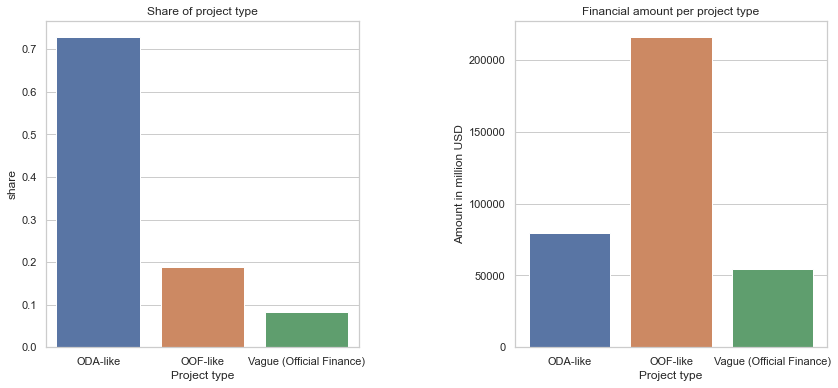

In [4]:
flow_class_df = flow_class_plot(CDF_data)

The acutal distribution of Chinese financial development finance:

In [5]:
flow_class_df

,flow_class,Share,Amount in USD
0,ODA,0.729554,7.957558e+04
1,OOF,0.187965,1.879647e-07
2,Vague,0.082481,5.471114e+04


As the plot indicates and the returned dataframe varifies, the majority of projects are ODA-like projects (73%) with a OECD-DAC level of concessionality. When we shift the focus of the analysis to the financial value of the projects, these 73% of total projects only account for roughly 22% of the total financial amount of Chinese development finance. 
The majority of Chinese financing is OOF-like. By the charackter of the OOF-like projects (export promotions, loans at market rates,...) this high financial value might already give a hint that the Chinese Government uses development finance first and foremost as a mean to help themselves.

## 3.2 Sectoral Distribution <a name="section3.2"></a>

The dataset contains the OECD-DAC sector classifications of each coded project. This enables us to get an insight on how the Chinese government allocates its development finance towards the sectors.

Again, it is important to distinguish between the number of projects per sector and the financial value of development finance that the Chinese Governemnt invests in this sector. The two plots indicate that by far the most fimancial value is invested in the sectors of energy, followed by transportation and industry, mining and construction. While looking at the project counts per sector, the picture is completly different: Most projects are in the health-, education- and governance sector, but do only account for arround 2% of the total financial value of chinese development finance.

##### Extension: Sectoral Plot and share of project types per sector

All projects of the health-, education and governance sector account for 2.69% of the total financial value,
whereas the energy-, transportation and industry/mining sector accounts for 71.50%


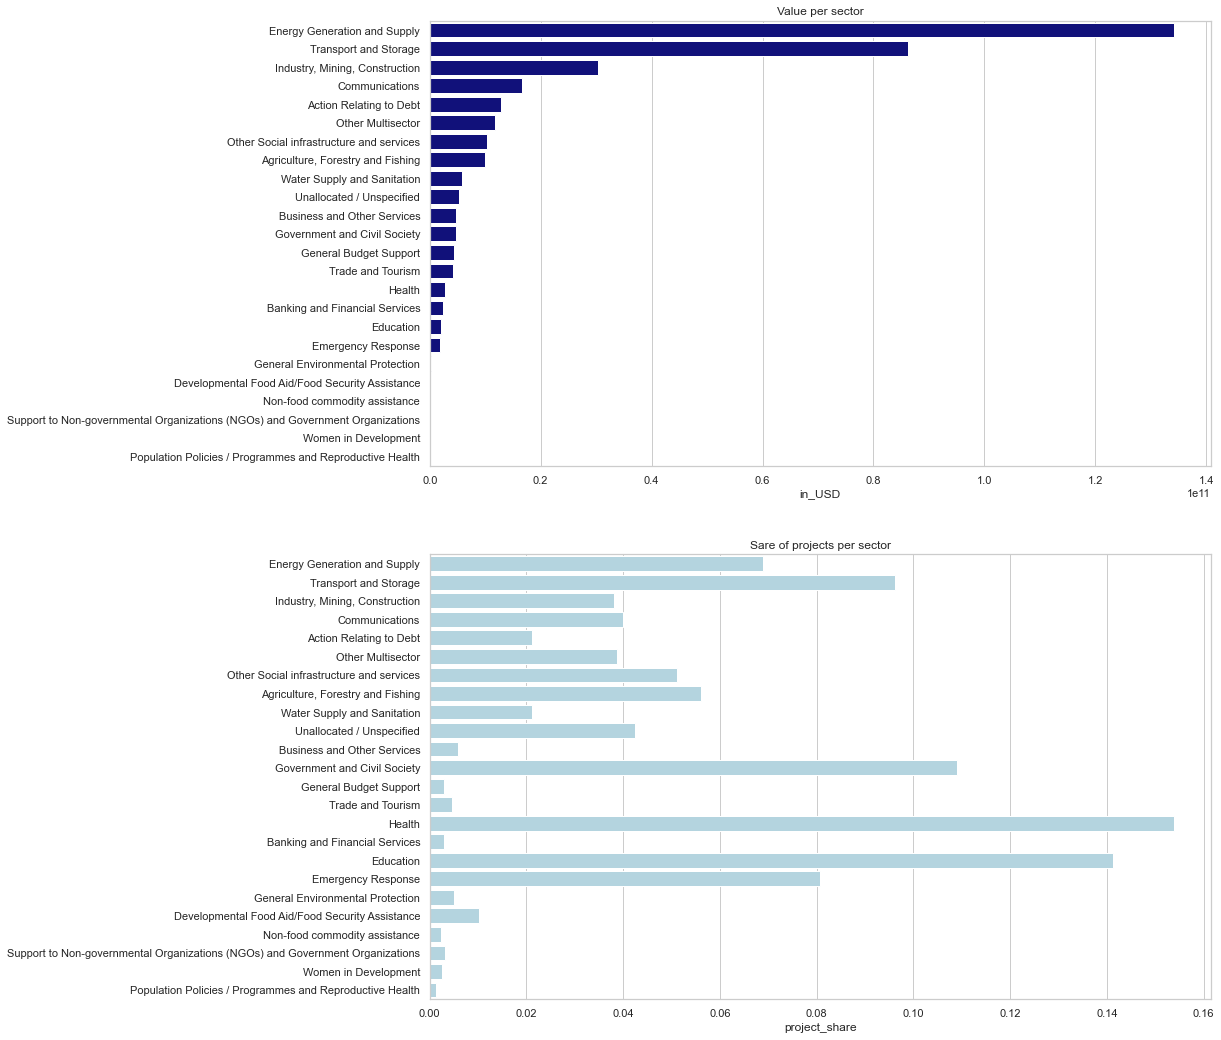

In [6]:
sectoral_plot(CDF_data)

The first two plots already reveal an essential characteristic of Chinese development finance. The Chinese government isntrumentalises the development aid as an self serving tool to increase its exports. This hypothesis is suported with the findings when analysing the sectoral distribution of Chinese development finance. Clearly, in terms of financial amounts, the focus lies on the energy-, transportation and industry/mining sector which accounts for 71.50% of the total amount of Chinese development finance for the 2000- 2014 period.  

As an consequence, I will check the share of the project type for each sector. Following the previous analysis, I expect the share of OFF-like projects to be disproportionaly higher in sectors with a small amount of Chinese development finance and vise versa.

##### In the following you can have a look at the individual shares of project types in the different sectors:


In [7]:
def explore_sectors(data):
    sector = "Education"
    #### Please delete the comment in [4] for this function to properly work
    #sector = input("Enter sector name (as in the plot above): ")
    try:
            val = str(sector)
    except (ValueError, KeyError):
            print("One more try: Enter a valid sector \n Try again:")
            sector = input("Enter sector name (as in the plot above): ")

    stats = data[data.crs_sector_name == val].flow_class.value_counts(1).to_frame("Percentage");
    stats.Percentage = round(stats.Percentage,4)*100
    stats["Absolute"] = data[data.crs_sector_name == val].flow_class.value_counts()
    try:
        return stats;
    except:
        print("\nError! Please try this again. Example for input: Transport and Storage")
    

In [8]:
explore_sectors(CDF_data)


,Percentage,Absolute
ODA-like,59.38,361
OOF-like,38.98,237
Vague (Official Finance),1.64,10


## 3.3 Finance Form of Projects <a name="section3.3"></a>


How are the Chinese financed projects structured? What form do they take on? The dataset enables us to explore the finance-form that the development project takes on. The following plot will give insight into how the Chinese development financed projects are funded. 

As the authors move on in their analysis, they combine OOF-like and vague OF-like projects together to OOFV-type projects. They argue that most Vague OF is actually OOF since the observed attributes of this projects resemble th attributes of OOF projects (e.g. infrastructure sector and loan financed). Therefore, comparing ODA and OOFV- type projects should reveal differences in these project types.

As the plot indicates, most Chinese development projects take on the form of a grant. When looking at the financing of OOF-like projects, the Chinese government execcsively uses loans and export credits as the form of development finance, which is inline with our previous analysis.

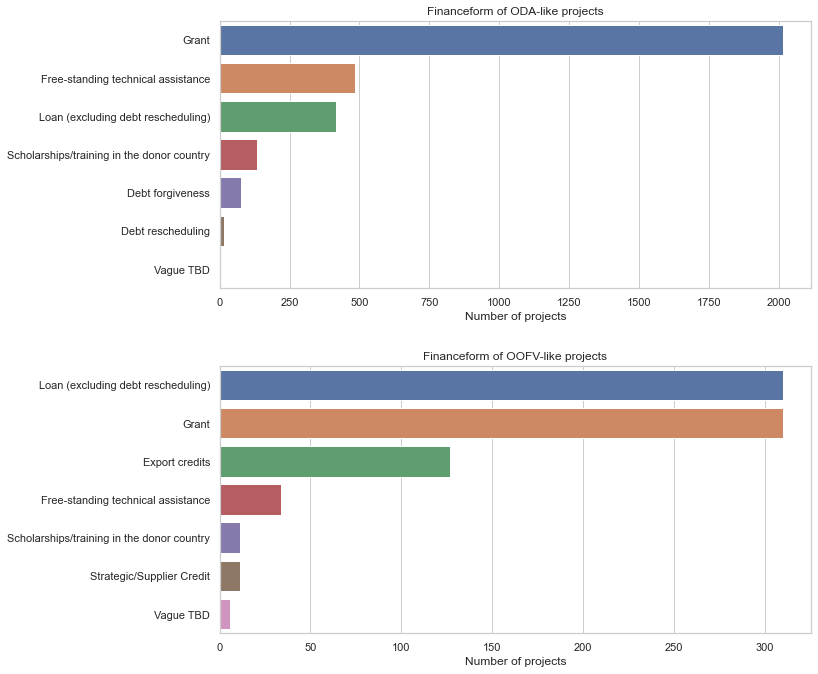

In [9]:
financeform_plot(CDF_data)

## 3.4 Cross-country Distribution of Chinese Development Finance <a name="section3.4"></a>


When looking at the cross-country allocation of the total number of Chinese development finance, the results are consistent with extant academic sources. 

Out of the top ten recipient countries, seven recipient countries are from the african continent. 

In [10]:
CDF_data.all_recipients.value_counts().sort_values(ascending = False)[:10]

Cambodia     168
Pakistan     121
Zimbabwe     120
Angola       110
Sudan        108
Tanzania     101
Ghana         95
Kenya         89
Ethiopia      88
Sri Lanka     86
Name: all_recipients, dtype: int64

The cross-country allocation in terms of financial value invested in the recipient countries however paints a very different picture with Russia as the number one recipient of chinese development finance. The financial amount is measured in millions of constant 2009 USD)

In [11]:
CDF_data.groupby("all_recipients").usd_defl.sum().sort_values(ascending = False)[:10]

all_recipients
Russia          3.662258e+10
Pakistan        2.432477e+10
Angola          1.655638e+10
Ethiopia        1.483371e+10
Sri Lanka       1.268011e+10
Laos            1.201567e+10
Venezuela       1.121902e+10
Turkmenistan    1.067643e+10
Sudan           1.023677e+10
Ecuador         9.952516e+09
Name: usd_defl, dtype: float64

The following plot is meant to summarize the cross-country allocation of the chinese development finance. Again we can distinguish between the project count which is expressed as share of years in the 2000-2014 period that country $i$ has received Chinese development finance and the financial amount that the country received. As pointed out before, depending on how we want to measure Chinese development finance, the worldplot will give us substantially different results

In [12]:
map_data = pd.read_stata("data/map_1yw_merge.dta")

Choose **probaid_PRC_OFn_all** for project count in the 200-2014 period

Choose **OFa_all_con** for the financial amount received in the 2000-2014 period

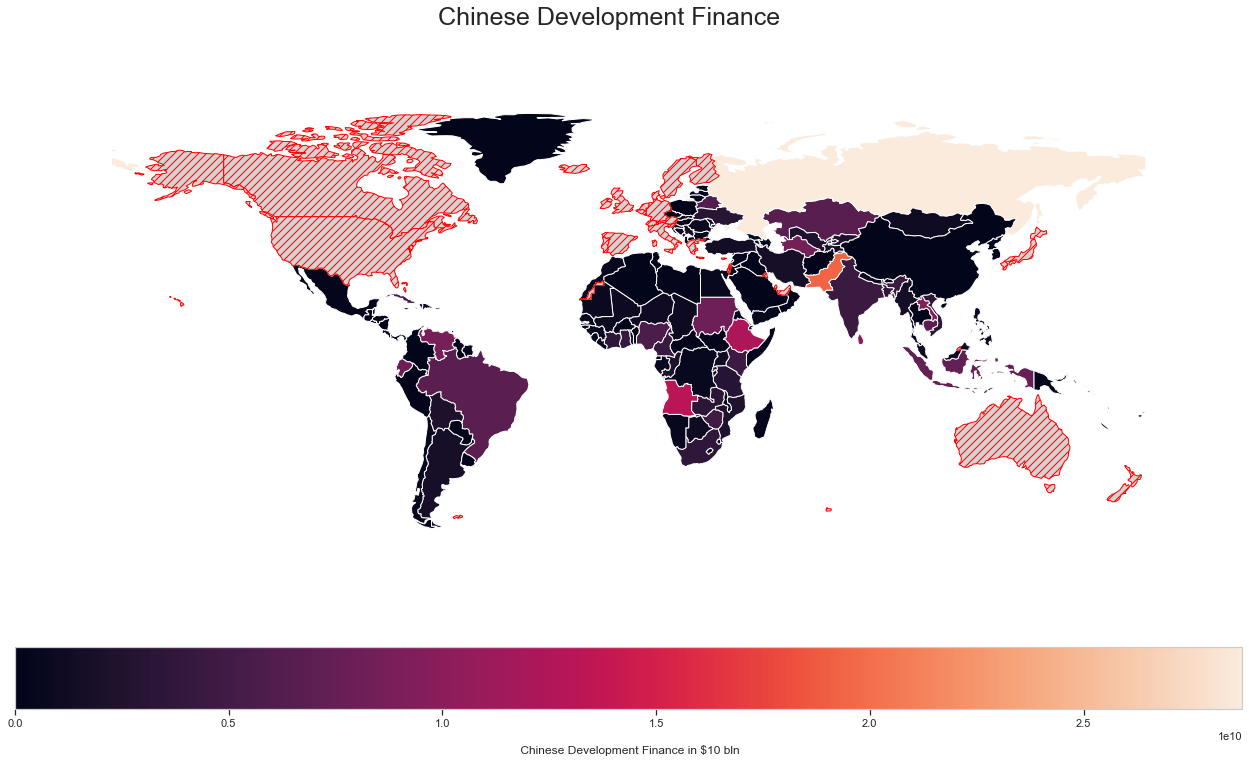

In [13]:
#try it out!
#worldplot_2(world_plot_data, "recipient_iso3", "probaid_PRC_OFn_all")
worldplot_2(map_data, "recipient_iso3", "OFa_all_con")


## 3.5 Factors that determined Allocation of Chinese Development Finance <a name="section3.5"></a>

Lets focus on the factors that are relevant for the allocation of Chinese development finance:

* First, I will extend the paper and reproduce the findings using simple but highly interpretable desriptive statistics as they provide a simple but well elaborated view on this issue. This aims also towards giving the reader of this notebook a better understanding of the variables that are relevant for the allocation without setting up mixed effect models


* Afterwards I will follow the authors and provide mixed effect models as well as panel-data models.

For the following part, we need a third dataset. This dataset contains all the factors that the authors thought could have an relevant effect on the allocation of the Chinese development finance.
Variables are coded for a given country and a given year. Some variables start earlier than in the year 2000, which is due to the lagged charackter of some variables of interest in the dataset.



In [14]:
allocation_data = get_allocation_data();
allocation_data.head()

,code,year,countryname,OFn_all,OFn_oda,OFn_oofv,prob_PRCaid_2000,factor1,OFa_all_con,OFa_oofv_con,...,A_Ltaiwanr,A_LDebtGDP,A_LIconcor,A_disaster_ln,A_Ltrade_con_ln,A_Lunsc,A_LINLINECHN,A_Lenglish,factor1_1,det_reservesCHN_con_1
39,AGO,2000-01-01,Angola,1.0,1.0,0.0,0.066667,-1.642051,0.000000e+00,0.000000e+00,...,0.0,165.251999,-1.417777,11.279757,19.956806,0.0,0.98113,0.0,-1.056065,-0.121037
40,AGO,2001-01-01,Angola,2.0,2.0,0.0,0.066667,-1.509742,1.084596e+06,0.000000e+00,...,0.0,89.903000,-1.516698,10.608267,21.552462,0.0,0.97436,0.0,-1.642051,-0.119968
41,AGO,2002-01-01,Angola,9.0,8.0,1.0,0.066667,-1.294446,2.638178e+08,0.000000e+00,...,0.0,80.173500,-1.326816,3.583519,20.636229,0.0,1.00000,0.0,-1.509742,-0.067196
42,AGO,2003-01-01,Angola,1.0,1.0,0.0,0.066667,-0.930074,1.927031e+07,0.000000e+00,...,0.0,72.972000,-1.136933,6.723832,21.023651,0.0,1.00000,0.0,-1.294446,-0.032252
43,AGO,2004-01-01,Angola,3.0,1.0,2.0,0.066667,-0.207976,8.831566e+07,8.831566e+07,...,0.0,59.770599,-1.303790,12.790635,21.720728,1.0,0.98148,0.0,-0.930074,-0.008290



### 3.5.1 Extension - Descriptive Plots <a name="section3.5.1"></a>

I decided to add this extension since the following descriptive plots provide a simple but powerful insight without setting up any sort of models as I will do in the following sections. The plots are divided into violinplots (for binary variables) and scatterplots (for quantitative variables) for selected variables of the dataset. Violinplots are great here since they allow to compare the peaks, valleys, and tails of the density curve between the plots in order to detect similarities and differences.

For the selection of the variables in the plots, I followed the authors of the paper, who followed modern aid allocation literature. Inline with the previous sections, I plot all the selected variables both in terms of project counts and also in terms of the financial amount of Chinese development aid.

The following variables will be depicted:


##### Qualitative variables


 
* *A_D99petroleum*, indicates wheter a recipient country produces Oil,
* *A_Ltaiwanr*, whether a recipient recognizes the Taiwan government
* *A_Lenglish*, official language is english


##### Quantitative Variables


 
* *A_LINLINECHN*, voting alignment in the UN General Assembly,
* *A_LDebtGDP*, recipient countries debt,
* *A_Lpopulation_ln*, population size, log,
* *A_Lpolity2*, policy score of country




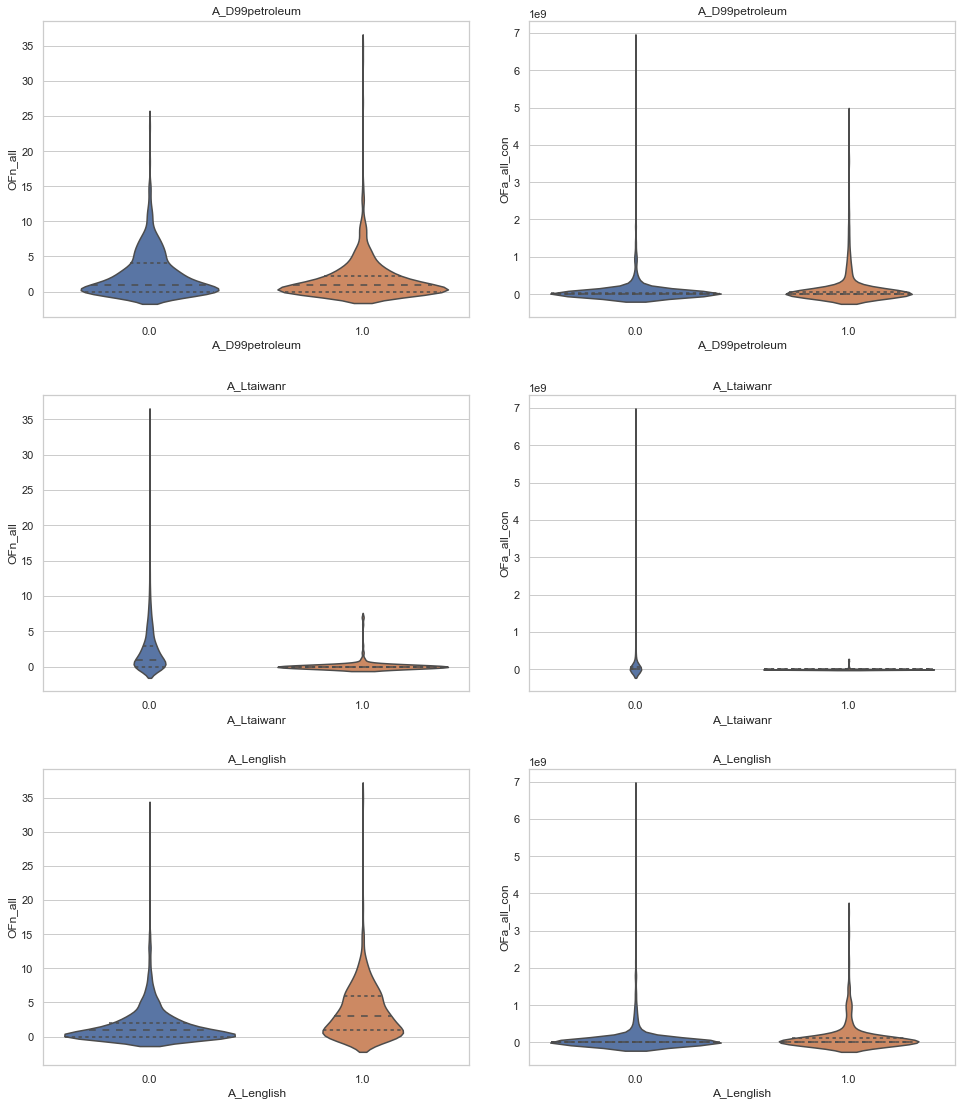

In [15]:
columns_of_interest = ["A_D99petroleum","A_Ltaiwanr","A_Lenglish"]
quali_descriptive_plots(allocation_data, columns_of_interest)

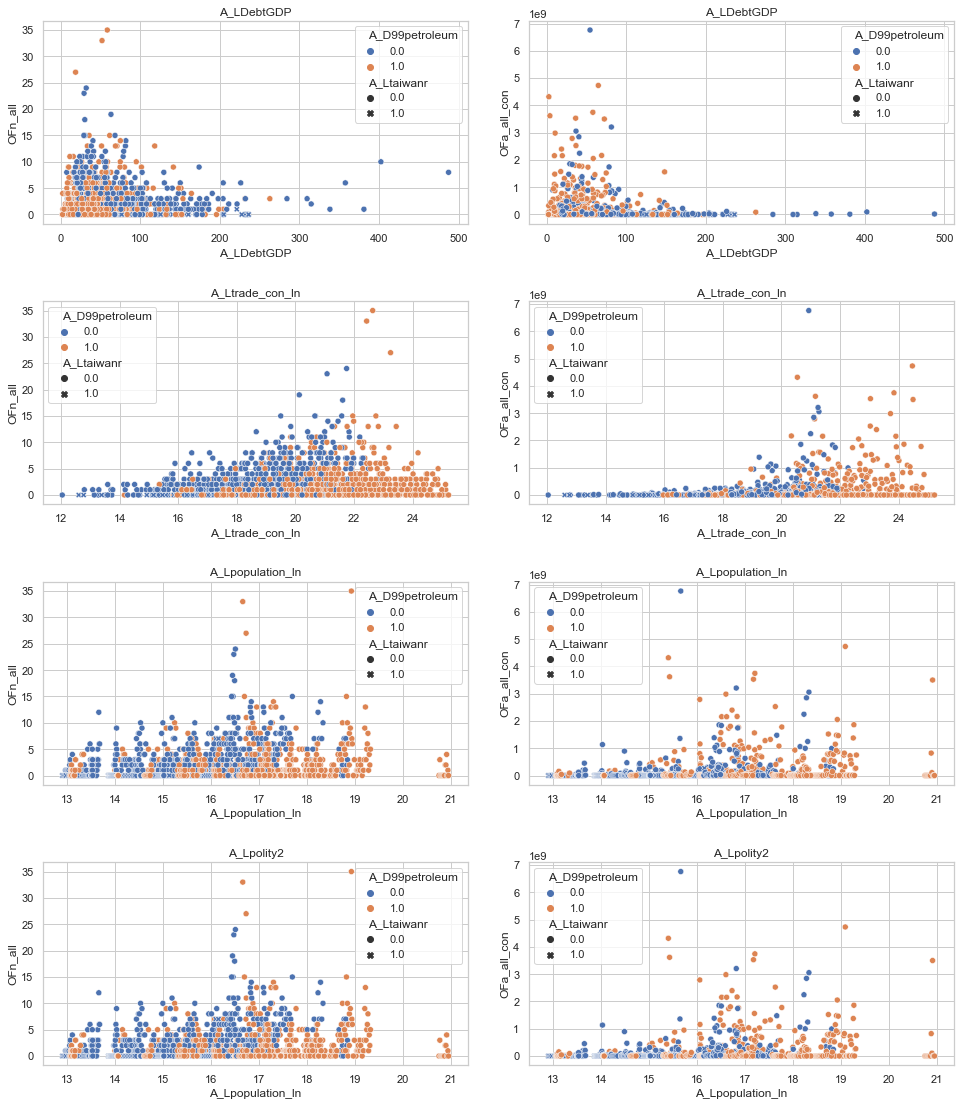

In [16]:
columns_of_interest_scatter = ["A_LDebtGDP","A_Ltrade_con_ln","A_Lpopulation_ln","A_Lpolity2"]
quanti_descriptive_plots(allocation_data, columns_of_interest_scatter)

**From this simple plots we can already draw some initial conclusions, which of course still need to be verified.**

To give an example of the interpretation here: Looking at the violinplot that plots the binary variable wheter a country us a oil producer (AD99_pertolum) against the number of projects for a given country and year we see that the Interquartile Range (50% of obervations) for not being a oil producer is larger than for oil producers, indicating that not being an oil producer is relevant for the allocation of Chinese development projects, allthough there are some outliers for oil producing countries that distort the picture. Furthermore we can compare the thickness of the plots which is indicating the underlying density cuve. For the given example, it follows that there are more oil-producing countries in a given year that receive no projects than not oil-producing countries.
Looking at all the violin plots we can observe that all our variables of interest seem to be higher related to the number of projects that a country recieves in a given year than to the financial amount of those projects. This observation is also confirmed when looking at the quantitative varibales in the scatterplot.

Overall, it seems that most of the described variables are associated with the allocation of Chinese development finance. But while looking at the plots for population size and the policy score, there seems to be no clear relationship with thethe number of projects nor the financial amount.  

### 3.5.2 Physical Project Inputs <a name="section3.5.2"></a>

Following the etablished research, the authors focus on a key determinant of the supply of Chinese financing which is the level of industrial overproduction. The intuition is following: Acording to Bluhm et al. (2019) and Dreher et al. (2019a), the Chinese government asseses domestic production inputs such as aluminium, cement, glass, iron,(...) to be strategically important commodities. As a consequence and taking into account the various state-subsidized, overleveraged firms, the production of these materials drastically exceed domestic demand. To tackle this issue, the Chinese government not only aims to reduce domestic supply by prohibiting new production facilities, but also desperatly tries to increase international demands by subsidizing  foreign infrastrucure projects and provide finance conditional upon the purchase of its overproduction.

**This is inline with the findings already made**: 
* First, the majority of Chinese development aid measured in USD are OOF-like projects, which have non-development purposes like export promotions.


* Second, the three sectors that receive most (energy-, transportation and industry/mining sector) accounts for 71.50% of all Chinese development finance as seen earlier and are relying on this production inputs.

It follows that we expect the Chinese government financing for economic infrastructure projects abroad to increase when the industrial overproduction increases. This double track strategy is even incorporated into the BRI and embedded in various official statements. 

### 3.5.3 Foreign Exchange Reserves <a name="section3.5.3"></a>

Following the intuition from the previous section, China needs to adress the outlined oversupply problem. Until China was "opening up", their foreign exchange reserves were growing and the authorities knew that this imposes a risk of inflation and currency revaluation if they would allow this reserves to enter the domestic economy. Furthermore, the number of domestic projects that needed finance was declining, which added another incentive to invest overseas. Facing this issue, China increased foreign exchange-denominated loans sharply to create favorable conditions for their own continuous economic growth. This foreign exchange reserves yielded 3% annual return during the period of interest, so the Chinese government institutions had an strong incentive to price foreign currency-denominated loans to oversea borrowers above this reference rate


**To investigate this initial conclusions further we will follow Dreher et al. (2021) and introduce mixed effect models.**

## 3.6 Mixed Effect Models <a name="section3.6"></a>

Since the authors did not explain their motivation for choosing mixed effect models, I will outline the intuition behind such models and how I approached this models:

Standart linear models (such as OLS) are best suited when all the observations come from a single homogenouos group without any underlying structur. If we recall the structure of the dataset at hand, we have panel data observations that belong to nested subgroups within the dataset. This would mean that some of the variance could be explained by the subgroups within the dataset. This is quite intuitive, since we are observing a set of countries over the same time horizon, so there are cleary some effects that differ along countries or years within the dataset. So considering differences between those subgroups may leed to better answers to the question on what factors are determining the allocation of Chinese development finance.

There are two variables for which we could define such proper subgroups:

* year
* countryname

In the following, I will rebuild the fixed- and random effect models from Table 1. As the authors, I will start with random effect models

In [17]:
allocation_data_lagg = allocation_data.set_index(["countryname", "year"])

First I am going to use  linearmodels PooledOLS. This is just plain OLS that understands various panel data structures. This simple model is useful as a base model from where we can explore the random- and fixed effects models.



In [18]:
exog_variables = ["A_LINLINECHN","A_Ltaiwanr","A_Ltrade_con_ln","A_D99petroleum",
                  "A_LDebtGDP","A_Lpolity2","A_Lgdppc_con_ln", "A_Lpopulation_ln","A_Lenglish"]
exog = sm.tools.add_constant(allocation_data_lagg[exog_variables])

mod = lm.panel.PooledOLS(allocation_data_lagg.OFn_all, exog)
mod_pooled = mod.fit()
#print(mod_pooled)

Next, we are setting up the random effects model. According to Wooldridge (2010), pooled OLS is employed when selecting a different sample for each time step, here year, of the panel data. Fixed effect or random effect models are best suited when the dataset at hand observes the same sample of individuals over the same time horizon. Therefore, opposing to the pooled OLS model, the random effects models as well as the fixed effects models do accounts for the structure of the dataset with the two subgroups. 


The model fit for the random- and fixed effects models is quite similar, but they have substantially different effects on the the coefficients and their significance.


In [19]:
mod = lm.panel.RandomEffects(allocation_data_lagg.OFn_all, exog)
mod_random = mod.fit(cov_type='clustered', clusters = allocation_data_lagg.code)

In [20]:
mod = lm.panel.PanelOLS(allocation_data_lagg.OFn_all, exog, entity_effects= True, drop_absorbed=True)
mod_fixed = mod.fit()

C:\Users\Jonathan\anaconda3\envs\student_project\lib\site-packages\linearmodels\panel\model.py:1796: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

A_D99petroleum, A_Lenglish

  warnings.warn(


In [21]:
print(lm.panel.compare({"Pooled": mod_pooled, "RE": mod_random, "FE": mod_fixed}, stars = True, precision = "std_errors"))

                            Model Comparison                           
                                Pooled                RE             FE
-----------------------------------------------------------------------
Dep. Variable                  OFn_all           OFn_all        OFn_all
Estimator                    PooledOLS     RandomEffects       PanelOLS
No. Observations                  1551              1551           1551
Cov. Est.                   Unadjusted         Clustered     Unadjusted
R-squared                       0.2702            0.1194         0.0971
R-Squared (Within)              0.0551            0.0724         0.0971
R-Squared (Between)             0.5043            0.4403        -10.748
R-Squared (Overall)             0.2702            0.2532        -5.4660
F-statistic                     63.409            23.221         21.820
P-value (F-stat)                0.0000            0.0000         0.0000
=====================     ============   ===============   =====

##### Replication of the random- and fixed effects models from Table 1

In [22]:
replicating_table1(allocation_data_lagg)

                                            Model Comparison                                           
                                    RE1             RE2             RE3             RE4             RE5
-------------------------------------------------------------------------------------------------------
Dep. Variable                   OFn_all         OFn_all         OFn_all         OFn_all         OFn_all
Estimator                 RandomEffects   RandomEffects   RandomEffects   RandomEffects   RandomEffects
No. Observations                   1551            1551            1551            1551            1551
Cov. Est.                     Clustered       Clustered       Clustered       Clustered       Clustered
R-squared                        0.1194          0.1365          0.1346          0.1503          0.1824
R-Squared (Within)               0.0724          0.0886          0.0870          0.0908          0.0915
R-Squared (Between)              0.4403          0.4727         

The results for the random effect models of Dreher et al. (2021), that help us to capture random effects of the data, are in line with previous findings: Looking at the first column, the number of projects that a country receives is increasing when the UN-voting is aligned with the voting of the Chinese government and decreasing when a country recognizese the government in Taiwan rather then the one in Beijing, it is receiving fewer projects. This two findings suport the claim that China either rewards countries for their allegiance or uses the allocation of development finance to bribe them into allegiance, depending on the standpoint. As a second insight, communication and trade plays a crucial rule in the allocation of Chinese development finance: Countries that trade a lot with china and countries that use english as their official language are more likely to receive such development projects. When a country produces oil or has a relatively high GDP p.c. level, it is less likely to receive Chinese development finance. Population apperas to be insignificant for the allocation as well as the political regime type of the receiving country.


In the second column of the regression table (*RE2*), the authors include the first factor of logged  and one-year-lagged domestic production of input materials as *factor1*, rather then including all input materials individually. In the third column (*RE3*), domestic overproduction is replaced by changes in Chinas foreign exchange reserves as collected by the World Banks World Development Indicators. The output shows, that both the domestic overproduction as well as the changes in Chinas foreign exchange reserves have a significant positive effect on the allocation of projects.

When we turn the focus towards the fixed effects models reported in column six and seven, the results for the input variables that were obtained using random effect models hold while others differ in magnitude as well as in significance. This can be explained since fixed effect models are designed under the assumption that we have a common effect size for the observed population, which is an unrealistic assumption in this setting since we are looking on a set of heterogenous countries across a period of years.



------
# 4. Identification <a name="section4"></a>
------
So far, we gained important insights into the Chinese development finance and what determines its allocation. As outlined in the introduction, the main cause of the paper by Dreher et al. (2021) is to answer the questions on wheter Chinese official finance does promote growth.  

The following causal graph shows the relationship between the development finance a recipient country receives and the growth p.c. of this recipient country. As indicated by X, there are several observed or observable covariates. 
In the classical development literature, these variables include additional variables that are controlled for, such as murder or crime rates, proxies for institutional, political and economic efficiency, ethnic fractionalization and so on. The authors choose the parsimonious setup since for all of the mentioned variables one could argue that they are endogenous to growth.

Besides these observed variables, there is also a number of unobservable variables that affect not only the Chinese develpment aid, but also the outcome. Thus, there are mutiple backdoor paths that need to be closed to isolate the causal effect of Chinese development aid on growth p.c.. Note that the setup deviates from most previous studies where the researchers used Aid (Official Chinese finance) either in per capita term or as a share of GDP. This results in the disadvantage that the effect of population and population growth to be the same as GDP and GDP growth. Here, the authors decided to follow a approach where they use either the project count or the logged financial value as the variable for development aid while explicitly controlling for the population size.

![dagitty-model%20%286%29.png](files/dagitty-model%20%286%29.png)

As is pointed out by the authors, the development finance $OF_{CHN,i,t-2}$ is likely to be endogenous to the dependent variable $Growth_{i,t}$. A potential source of its endogeneity is reverse causation: Not only does Chinese financial development has the potential to drive growth, but the growth of a recipient country may influence Bejjings decision to deploy development finance. The Chinese development finance and the real GDP per capita growth may positively correlated as the Chinese government prefers to concentrate its development finance towards countries with high growth, but also a negative correltation is possible due to its stated goal "to ensure its aid benefits as many needy people as possible" (p15, also state council 2011). Also when looking on this regression, it is rather lean compared to the rich dataset. It is therefore possible that $\epsilon_{i,t'}$ correlates with the dependent variable, so we have the risk of ommited-variable bias. 

To adress this problems, the authors employ an IV strategy which is based on the insights that we gained from the analysis before where we analysed the reasons for the allocation of Chinese development finance.


![dagitty-model%20%286%29.png](files/dagitty-modelS2.png)as can be seen in the second graph, the endogeneity is adressed by using two instruments:

* Chinese production materials (steel, aluminium,...) which varies over time, interacted with the probability of receiving Chinese development aid (varying across recipient countries, time constant)

* China´s net foreign exchange reserves, variieng over time, again interacted with the probability of receiving development aid which is again constant over time.

Adding these instruments though is still not sufficient to isolate the causal effect of Chinese development aid on the Growth per capita. In the second causal graph, the instruments are suspected to violate the exclusion restriction since the probability of receiving Chinese development finance may be directly linked to the growth in the recipient country. As stated before, the growth of a country in p.c. terms may influence the behaviour of the Chinese government, both positively and negatively and thus affect the robability that a country receives aid. To account for this, we need also to control for indiviudal effects of the observed countries and years through countryfixed () and yearfixed effects to account for the individual and time variing part of the two instruments. This allows us to controll for everything that is fixed for a specific country or year, wheter or not we measured it. Since only, out of all commonly used control variables in the most previous aid literature, a variable for the population size is included, the efficiency of the estimator is reduced but there is also no introduction of a bias to the estimates.  



# 5. Empirical Strategy <a name="section5"></a>

The aim is to analyze the causal effects of the Chinese development finance on growth. The authors set up the following regression for all recipient countries not listed as high-income countries by the worldbank given the year $t$:


\begin{equation}
Growth_{i,t} = \beta_{1}OF_{CHN,i,t-2} + \beta_{2}pop_{i,t-1} + \beta_{3}\eta_{i} + \beta_{4}\mu_{t} + \epsilon_{i,t'} 
\end{equation}

* $Growth_{i,t}$ as recipients country $i$´s real GDP per capita growth in $t$,
* $OF_{CHN,i,t-2}$ as measure of Chinese development finance two years before (either as the number of projects or their logged financial value),
* $pop_{i,t-1}$ indicates recipients $i$ logged population size in $t_{-1}$,
* $\eta_{i}$ represents country-fixed effects,
* $\mu_{t}$ the time fixed effects and
* $\epsilon_{i,t'}$ the error term.

As discussed fot the identification, the development finance $OF_{CHN,i,t-2}$ is likely to be endogenous to the dependent variable $Growth_{i,t}$.

## 5.1 IV Strategy <a name="section5.1"></a>

These described endogeneity is adressed by designing an instrumental variables regression using the following first-stage regresion:

\begin{equation}
OF_{CHN,i,t-2} = \gamma_{1}Material_{t-3} * p_{CHN,i} + \gamma_{2}Reserves_{t-3} * p_{CHN,i} + \gamma_{3}pop_{i,t-1} + \gamma_{4}\eta_{i} + \gamma_{5}\mu_{t} + \mu_{i,t-2} 
\end{equation}

The instruments that are used are:

* $Material_{t-3}$ the lagged, detrended and logged Chinese production materials varying in $t$,


* $Reserves_{t-3}$, the lagged and detrended change in China´s ne foreign exchange reserves,

both interacted with:
* $p_{CHN,i}$ the probability of country $i$ receiving Chinese development finance, as share of years in the 2000-2014 period that country $i$ has received Chinese development finance.

The two interacted variables are expected to have positive coefficients. It indicates, that countries which frequently receive financial development from China are expected to benefit disproportionally from increasing overproduction of materials and foreign reserves. As discussed above, the possible violation if the exclusion restriction is adressed by controlling for 
country and year fixed effects, $\eta_{i}$ and $\mu_{t}$ respictively, to control for the country- and time specific effects of $p_{CHN,i}$ as well as for the levels of Materials and Reserves. Given that the setup controls for the effects that the probability of receiving Chinese development, the interaction of it with an exogenous variable results in an exogenous instrument (under Assumption of parallel trends, as discussed in the following).

Since we measure the differential effects that $Material_{t-3}$ and $Reserves_{t-3}$ have on the amount of Chinese development finance $OF_{CHN,i,t-2}$ for countries with a high compared to a low probability of receiving this projects, we use the intuition of a **difference-in-difference (DiD)** setting:

Allthough the probability of receiving projects differs among the recipient countries, we assume that the real GDP per capita growth, $Growth_{i,t}$, of all countries grouped by different $p_{CHN,i}$ is not affected differently by changes in the availability of $Material_{t-3}$ and $Reserves_{t-3}$, but only affected via $OF_{CHN,i,t-2}$, while we are controlling for country- and year-fixed effects. Therefore, $Material_{t-3}$ and $Reserves_{t-3}$ are assumed to be exogenous to official financing since they both cannot be correlated with the errorprocess and we end up with an exogenous treatment $OF_{CHN,i,t-2}$ for our regression. This setting allows to account for the unobserved variables, here the country- and year specific effects. 

As mentioned, the authors point out that their setup deviates from existing literatur and research in a number of ways. As pointed out, the aouthors decided to choose the number of projects or their financial value as measure for the amount of aid instead of aid p.c. or aid as a share of GDP as previous studies did. Besides that and the rather parsimonious main regression, the authors setup deviates in several more ways from extant literature on aid and growth (Clemens et al. 2012; Galiani et al. 2017; Dreher and Langlotz 2019):

* First of all, remember that the dataset distinguihses between OOF and ODA projects in contrast to existing literature. This presents the oppurtunity to explain different impacts of development aid depending on the project type. To account for this, the definition of the treatment varies such that we can seperately investigate the growth effects of more concessional finance (ODA) and less concessional (or market-based) forms of official financing (OOF) from China. 

* Secondly, since the dataset was collected using the TUFF methodology, the researchers rely on project commitments rather than disbursements. For this purpose, the lagged nature of the Chinese development finance is introduced. The 2 year lagg is based on a subsample of 300 projects that contain information on the actual start and ending points and is consistent with conventional wisdom. Note that since only 300 projects are selected into this subsample, the subsample itself may suffer from selection bias, so there will be results presented using various lagg structures.

* Thirdly, since the dataset is restricted to the 2000-2014 period, the analysis is performed using annual data rather than averaged data. This is important regarding the interpretation of the results, which therefore primarily test wheter Chinese development finance has an effect on growth p.c. in the short run.



Lets look at the key assumption of DiD (parallel trends), which states that average outcomes of the groups in the absence of treatment would follow parallel paths over time. In the theoretical setting of the authors, they assume his assumption to be  satisfied, since  the growth of countries with different probabilities of receiving projects is not affected differently by changes in $Material_{t-3}$ and $Reserves_{t-3}$ as stated before. 

https://www.publichealth.columbia.edu/research/population-health-methods/difference-difference-estimation
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4937082/  DiD Regressions
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6096851/  instrumental variables


https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/factor-analysis/
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/factor-analysis-2/

## 5.2 Checking Parallel Trends Assumption <a name="section5.2"></a>

For a violation of the exogeneity of our interacted instrument, the changes in the logged input materials or foreign reserves have to affect recipient-country growth differentially in countries with a high compared to a low probability of receiving Chinese projects for reasons unrelated to China’s official financing. The next plots rebuild Figure II of the paper. 

In the following we will use another dataset which is provided by the authors. This dataset contains more informations than the previous datasets that we used and reports data for a longer time horizon. This is needed to transform the data since the replication relies on lagged varaibles. The data was modified as follows: 

* Since the authors use lagged variables in the described setup, we need to check we have a sufficiently long periods of observations for each recipient country and not just a few years years, which are also not neseccarly continuously reported. I accounted for this inconsitency by adding rows for all countries that miss some years of observation. 
* After that I lagged all variables as described in the paper and created as well as renamed variables
* Last I cleaned the data up and applyed the final cutoff

After modifying, we end up with a dataset containing the same countries that the authors listed in their Appendix C.

In [23]:
effectiveness_data = get_effectiveness_data(multiindex = False)
len(effectiveness_data.code.unique())


150

In [24]:
results_df = get_parallel_trends_df(effectiveness_data)

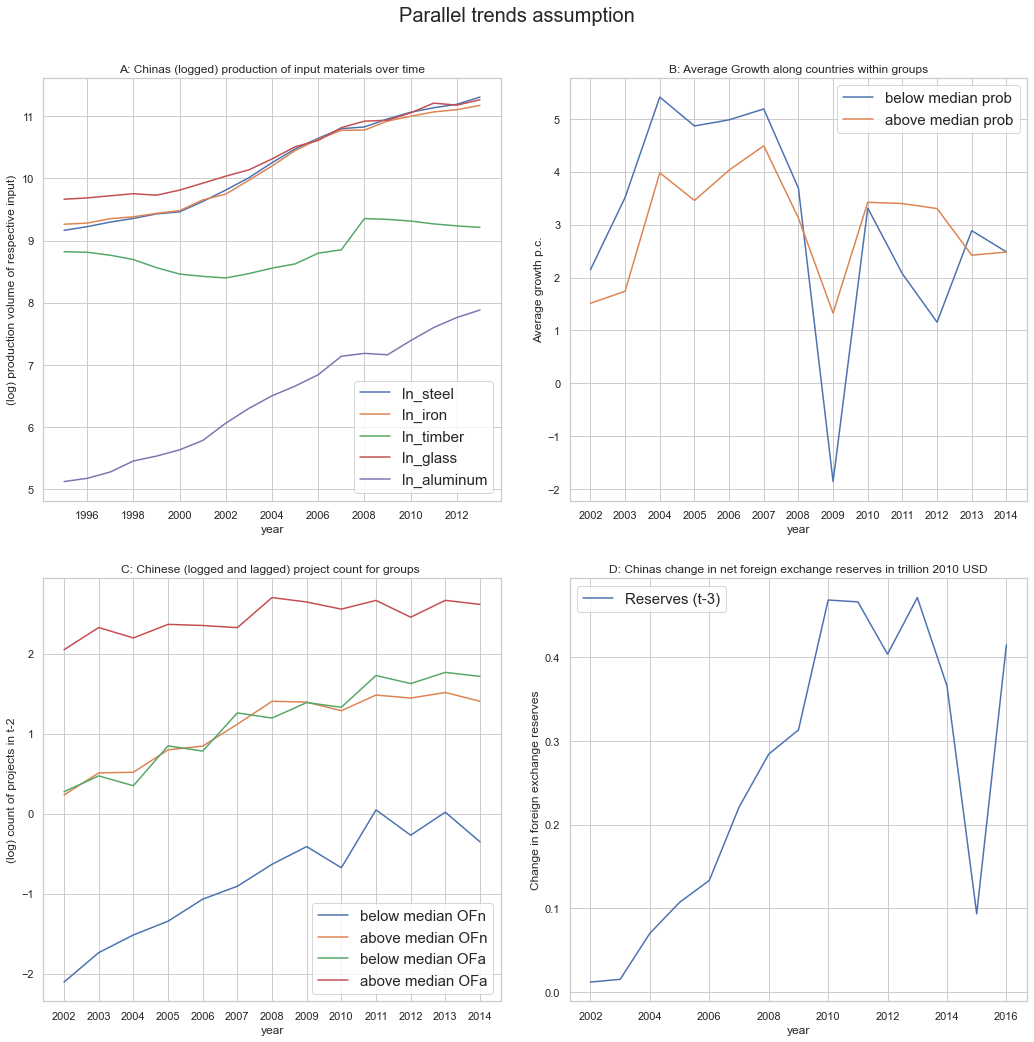

In [25]:
plot_parallel_trends(results_df, effectiveness_data)

The first plot (A) shows the logged Chinese production of of aluminum (in 10,000 tons), cement (in 10,000 tons), glass (in 10,000 weight cases), iron (in 10,000 tons), steel (in 10,000 tons), and timber (in 10,000 cubic meters) over time. 
The second and the third plot illustrate the group-specific trends in the per capita growth of GDP (B) as well as the number of projects and their financial value (C) for two groups. The groups are defined by having an abov the median probability to receive a project and a probability that lies below the median. The fourth plot 

Looking at this plots, the probabilty specific trends for receiving a Chinese development project as well as the lagged and logged financial value of the projects (C) seem all mostly parallel across the countries grouped by having a above median probability of receiving aid compared to a below median probability of receiving aid. This can also be said about the trend in the growth p.c of the recipient countries, which is also mostly parallel across the groups.

The figure illustrates also  that the Chinese input production (A) as well as the changes in the Chinese foreign reserves (D) do not seem to have a different impact on countries with a high compared to a low probabilty of receiving projects. Therefore the results give no clear reasosn to assume that the parallel trend assumption is violated.


# 6. Does Chinese Development Finance Promote Growth? <a name="section6"></a>

## 6.1 Main Results <a name="section6.1"></a>

---
<span style="color:blue">**NOTE**:</span> Please note that the authors used a stata function which enabled them to do the 2SLS in one step. I could not find a function in Python doing the same, so I used PanelOLS and preformd the first- and second stage regression seperatly. **Therefore, the computed standard errors of the second stage models are invalid in this section and the following subsections,** since they do not adjust for using predictions from the first-stage regression
as regressors in the second-stage regression. 

Nevertheless I will include these standard errors, since they are close to the reported ones in the paper. **If I find a deviation from the reported standard error that affects the interpretation, I will indicate this.**



---

This time we get the data using the function and setting multiindex equal to True. This gives us the same dataset as before but with an multiindex such that we can apply linearmodels PanelOLS. Please note that the authors used a stata function which enabled them to do the 2SLS in one step. I could not find a function in Python doing the same, so I used PanelOLS and preformd the first- and second stage regression seperatly. Therefore, the computed standard errors of the second stage model are invalid since they do not adjust for using predictions from the first-stage regression
as regressors in the second-stage regression. 

The following regression tables will present the main results of Chinese development finance on growth for the 2002-2016 period. First, we will look at the results when we take $OF_{CHN,i,t-2}$ as the summ of all projects (without distinguishing between project types) and $OF_{CHN,i,t-2}$ as the (log) financial amount of all projects.

The first three columns show the result when we take the summ of all projects (without distinguishing between project types) as  $OF_{CHN,i,t-2}$. The first column shows the results using OLS, the second the first stage regression and the third the second stage regression.

In [26]:
effectiveness_data = get_effectiveness_data(multiindex = True)

In [27]:
OFn_OFa_all_Table2(effectiveness_data, table = True)

                                                   Model Comparison                                                   
                                 OLS OFn_all    FS OFn_all    SS OFn_all    OLS OFa_all       FS OFa_all    SS OFa_all
----------------------------------------------------------------------------------------------------------------------
Dep. Variable                      growth_pc     l2OFn_all     growth_pc      growth_pc     l2OFa_all_ln     growth_pc
Estimator                           PanelOLS      PanelOLS      PanelOLS       PanelOLS         PanelOLS      PanelOLS
No. Observations                        2061          2061          2061           2061             2061          2061
Cov. Est.                         Unadjusted     Clustered     Clustered     Unadjusted        Clustered     Clustered
R-squared                             0.0104        0.0459        0.0128         0.0054           0.0060        0.0121
R-Squared (Within)                   -0.0272    

In [28]:
OFn_OFa_oofv_Table2(effectiveness_data, table = True)

                                                     Model Comparison                                                    
                                 OLS OFn_oofv    FS OFn_oofv   SS OFn_oofv   OLS OFa_oofv       FS OFa_oofv   SS OFa_oofv
-------------------------------------------------------------------------------------------------------------------------
Dep. Variable                       growth_pc     l2OFn_oofv     growth_pc      growth_pc     l2OFa_oofv_ln     growth_pc
Estimator                            PanelOLS       PanelOLS      PanelOLS       PanelOLS          PanelOLS      PanelOLS
No. Observations                         2061           2061          2061           2061              2061          2061
Cov. Est.                          Unadjusted      Clustered     Clustered     Unadjusted         Clustered     Clustered
R-squared                              0.0080         0.0356        0.0066         0.0065            0.0444        0.0068
R-Squared (Within)      

In [29]:
OFn_OFa_oda_Table2(effectiveness_data, table = True)

                                                   Model Comparison                                                   
                                 OLS OFn_oda    FS OFn_oda    SS OFn_oda    OLS OFa_oda       FS OFa_oda    SS OFa_oda
----------------------------------------------------------------------------------------------------------------------
Dep. Variable                      growth_pc     l2OFn_oda     growth_pc      growth_pc     l2OFa_oda_ln     growth_pc
Estimator                           PanelOLS      PanelOLS      PanelOLS       PanelOLS         PanelOLS      PanelOLS
No. Observations                        2061          2061          2061           2061             2061          2061
Cov. Est.                         Unadjusted     Clustered     Clustered     Unadjusted        Clustered     Clustered
R-squared                             0.0087        0.0529        0.0154         0.0062           0.0074        0.0145
R-Squared (Within)                   -0.0260    

As shown in column one and for of each of the regression comparisons (simple PanelOLS model), the number of Chinese governmend financed developmend projects is positively correlated with the growth p.c in the recipient countries. The same holds true when we are looking at financial amounts rather than numbers, but the effect is stacistically weaker as will be discussed in the following.

## 6.2 Extension - Visual Representation of Results <a name="section6.2"></a>

In the following, the 90% confidence intervall is routinly plotted and discussed. 

**Keep in mind that we want to detect an effect on growth for the two year lagged measurment of Chinese Official Finance, so growth p.c. has to be interpreted as growth p.c. two years after commitment**

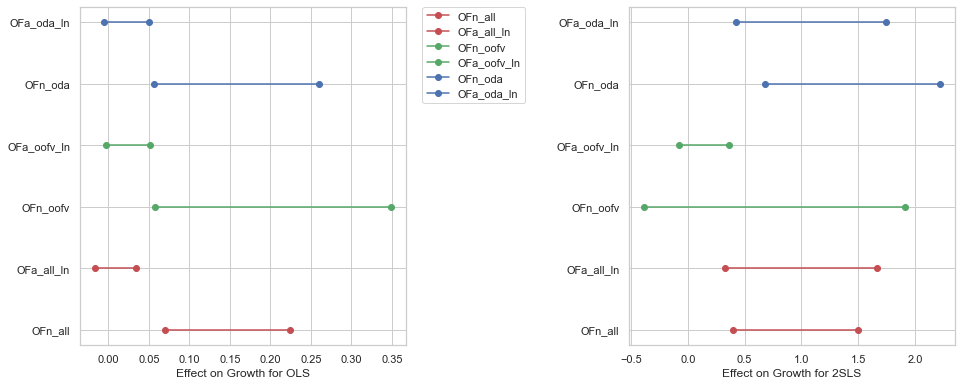

In [30]:
confidence_intervall_plot(effectiveness_data, 0.1, "standart")

### OLS

Using a 90% confidence intervall, an additional Chinese development finance project (OFn_all) is associated with an growth p.c between 0.07 and 0.23 percentage points. The results are similar when we looking at only the OOF like and vague OOF-like projects (OFn_oofv) as well as the ODA-like defined projects (OFn_oda).
What can be seen in the plot that depicts the CI´s is that an additional OOF-like or vague OOF-like project is associated with more growth than the more stricter ODA-like projects. A doubling of the amount of Chinese OF (OFa_all_ln) to the average recipient country is only associated with a change in growth p.c. between -0.02 to 0.03 percentage points. The effect that the amount has on the growth p.c- remains little, but is again higher for the OOF- and vague OOF-like projects.

### 2SLS

As described in Chapter 3.3, the OLS results in the first column of each regression table are likley to be biased by endogeneity. The second and fith columns of each table represent the first stage regression results and the third and the sisxt columsn the second stage results. 

As expected and stated in Chapter 3.3, the two instruments have positive coefficients in all but one first-stage regressions. This confirms the thesis that increases in the supply of production inputs and reserves have a disproportionally positive effect on projets for countries that receive Chinese support on a more regular basis. 

As can be seen in the third and sixth columns of the tables, it can be seen that additional Chinese financed projects incerase economics growth. This holds not only for the sum of all project types, but also if we look at ODA and OOFV- type projects. Moreover, the effects of Chinese official financing on growth p.c. is overall stronger than what OLS predicted in the biased endogenouos setup. Looking at the confidence level plot and using the numbers obtained from the regressions, an additional Chinese project increases growth by 0.41 to 1,49 percentage points, compared to the 0.07 to .023 percentage point increase that is reported for OLS.
Opposing to the results for OLS, OOF-like and vague OOF-like projects are not associated with more growth compared to the stricter ODA-like projects, as was the case for the OLS model. ODA-like projects on the other hand increase the growth p.c. in a range of 0.69 to 2.21 percentage points, which is a huge increase to the range calculated for OLS.

When looking at financial amounts rather than project numbers (columns 4-6 of each table), the effects are persistent. When the yearly amount of Chinese official finance that a recipient country receives is doubled, it is associated with a 0.05 to 1.33 percentage points increase in growth. The effect on growth that the Chinese development finance in financial terms has is again larger for the development aid in the strict sense, namely ODA-like projects. Chinese OOF and vague OOF-like projects show a point estimate of 0.76, but the plot and the regression iteslf imply a 90% confidence intervall ranging from -0.39 to 1.91 percentage points increase in growth p.c.. But still, this cleary implies a non-zero positive effect on growth.






## 6.3 Extension - Checking Instrument Validity <a name="section6.3"></a>

#### Instrument relevance
Weak isntruments provide only little insight into the variation of the endogenouos variable. In our setting, althought the instruments in all first- stage regressions are not inividually significant at conventional levels, the rule of thumb for weak instruments indicates that our instruments are jointly significant (F- statistic > 10 while looking at the individual regression tables before columnbind them in nice tables for the output). This is also due to the obvious correlation between those instruments (years with high production result in high export surpluses).

#### Overindentifying test

If there is correlation between an instrument and the error term, IV regression is not consistent as pointed out before .Since I had to calculate the 2SLS estimates in two steps, I could not use the functions of linearmodels.iv.results. Unfortunately I could not find another function to check for the exogeneity of the instruments. Therefore, I wrote my own function which tests for the overidentifying restriction. 

In [31]:
# calling the regression-outputs of interest
OLS1, FS1, SS1, OLS2, FS2, SS2 = OFn_OFa_all_Table2(effectiveness_data, table = 0)
OLS1_oofv, FS1_oofv, SS1_oofv, OLS2_oofv, FS2_oofv, SS2_oofv = OFn_OFa_oofv_Table2(effectiveness_data, table = 0)
OLS1_oda, FS1_oda, SS1_oda, OLS2_oda, FS2_oda, SS2_oda = OFn_OFa_oda_Table2(effectiveness_data, table = 0)

(0.5222, 0.0002)

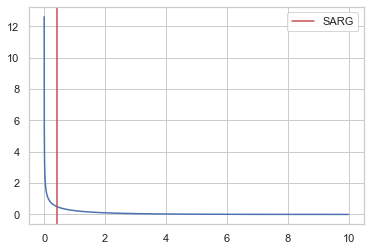

In [32]:
OverindentifyingTest_after_Sargan(FS1, SS1, effectiveness_data, True)

The first output value represents the p-vlaue for the Chi-squared Sargan teststatistic and the second output value represents the $R^2$ for the regression of the residuals on all exogenous variables. If the instruments and the exogenous model variables are truly exogenous, they should not be correlated with the residuals and regression of the residuals on the exogenous variables should yield a low $R^2$.

According to the results, the value for the Chi-squared distributed Sargan teststatistic (computed for the number of all projects (OFn_all)),

$SARG = n * R^2$,

lies well below all critical values. In addition, the reported $R^2$ is very low. Following this, we fail to reject the null hypothesis that we have exogenouos instruments and proofed that our instruments are exogenous.

When looking at the other resuts for the 2SLS models, we get similar results. If you want to try this, just enter different corresponding first- and second stage models into the OverindentifyingTest_after_Sargan function. The following table conducts the Overindentifiying test for all models and does also include the $R^2$ values for the regression of the 2SLS residuals on the exogenouos variables (IV´s and other variables).

In [33]:
all_p_values(effectiveness_data)

,p_value,R_squared
OFn_all,0.5222,0.0002
OFa_all_ln,0.5508,0.0002
OFn_oofv,0.5692,0.0002
OFa_oofv_ln,0.9885,0.0
OFn_oda,0.172,0.0009
OFa_oda_ln,0.4342,0.0003


As can be seen by exploring the implemented function for the different models that were setted up depending on the project type and by looking at the last output, the overidentifying restrictions test fails to reject that additional instruments are exogenous.

## 6.4 Timing of the Growth Effects <a name="section6.4"></a>

To investigate the timing of the effect of Chinese development finance on growth, a variant of the previous model setup is estimated, where the lag structure of aid changes. The lag structure of the instruments is changed in analogy, meaning that when we lag the Chinese development finance by four years (remember: two year lag in baseline model), we change the the lag structure of the instruments by five years. The baseline result is also included for convenience.

In [34]:
effectiveness_data_lagged = get_effectiveness_data_various_lags(True)

In [35]:
various_lags_2SLS = various_lags_2SLS_table(effectiveness_data_lagged)
various_lags_2SLS

,All projects,OOF projects,ODA projects,(log) All amounts,(log) OOF amounts,(log) ODA amounts,Observations
Chinese OF (t+1),-0.02,0.367,-0.158,0.122,0.099,-0.057,2102
SE (t+1),(0.296),(0.527),(0.382),(0.282),(0.09),(0.271),-
Chinese OF (t+0),0.418,0.461,0.681,0.473,0.118,0.449,2109
SE (t+0),(0.284),(0.551),(0.384),(0.285),(0.096),(0.285),-
Chinese OF (t-1),0.814,0.849,1.23,0.848,0.156,0.888,2087
SE (t-1),(0.293),(0.293),(0.293),(0.293),(0.293),(0.293),-
Chinese OF (t-2),0.948,0.761,1.45,0.995,0.142,1.086,2061
SE (t-2),(0.336),(0.698),(0.47),(0.408),(0.132),(0.401),-
Chinese OF (t-3),0.888,0.535,1.541,0.955,0.095,1.27,1916
SE (t-3),(0.382),(0.854),(0.517),(0.429),(0.149),(0.442),-


---
<span style="color:blue">**NOTE**:</span> Remember: Since I had to manually calculate the 2SLS estimator, the standard errors are invalid. Since they barely differ from the reported ones, they are still included. If I detect any deviation from the reported standard errors of the paper that affect the interpretation, I will indicate this.

---

Looking at column 1 of the table, the coefficients and the reported standard errors suggest that Chinese development projects increase the growth from one to three years after they were commited since the coefficients are positive and statistically significant at the five percent level. The strongest growth seems to occur for the two year lagged Chinese development finance, which is the baseline model that was depicted in depth in the previous subsections. For the other lags, the coefficients are insignificant and turn even negative for the six year lagged model. The first row shows a placebo test, that investigates the effect of future aid on growth. As the coefficient is insignificant, the model fails to predict growth on the basis of future development finance, which is expected.

The subsequent columns, column 2-6, report the effect that Chinese development finance has for the different project types and for the financial amounts rather than the project count (4-6). As in the paper by Dreher et al. (2021), the last column shows the number of observations. 

This is inline with the results reported by Dreher et al. (2021), allthough our standard errors are invalid as pointed out above.

---
<span style="color:blue">**NOTE**:</span> I reported somewhat different values than Dreher et al. (2021) as well as the number of observations that I used sometimes differ slightly. But envertheless, thee interpretation of my results are inline with the results reported by Dreher et al. (2021).

---

## 6.5 How does Chinese Development Finance cause Growth? <a name="section6.5"></a>

In [36]:
def replicate_table4(data):
    
    table4_results = pd.DataFrame(index=["Panel A: Gross Fixed Capital Formation","SE",
                                         "Panel B: Gross Fixed Privat Formation","SE",
                                         "Panel C: Gross Fixed Capital Formation","SE",
                                         "Panel D: Gross Fixed Capital Formation","SE",
                                         "Panel E: Gross Fixed Privat Formation","SE",
                                         "Panel F: Gross Fixed Capital Formation","SE",
                                         "Panel G: Gross Fixed Capital Formation","SE",
                                         "Panel H: Gross Fixed Privat Formation","SE",
                                         "Panel I: Gross Fixed Capital Formation", "SE"])
   # warnings.filterwarnings("ignore")

##### all regressions for all projects

    dependendFS = data.l2OFn_all
    exog2 = sm.tools.add_constant(data[["l1population_ln", "l3Reserves*probOFn_all","l3factor1*probOFn_all"]])
    mod_FS1 = lm.panel.PanelOLS(dependendFS, exog2, time_effects = True, entity_effects=True, drop_absorbed=True).fit(cov_type='clustered', clusters = data.code)

    fitted_c = mod_FS1.fitted_values
    data["Chinese_OFn(t-2)"] = fitted_c
    

    dependentSS1 = data.dgfcf_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS1, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS1 = round(mod_all.params[1],3) 
    SE1 = round(mod_all.std_errors[1],3)
    
    dependentSS2 = data.dgfcf_priv_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS2, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS2 = round(mod_all.params[1],3) 
    SE2 = round(mod_all.std_errors[1],3)
    
    dependentSS3 = data.dimp_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS3, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS3 = round(mod_all.params[1],3) 
    SE3 = round(mod_all.std_errors[1],3)
    
    dependentSS4 = data.dexp_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS4, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS4 = round(mod_all.params[1],3) 
    SE4 = round(mod_all.std_errors[1],3)
    
    dependentSS5 = data.dcons_all_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS5, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS5 = round(mod_all.params[1],3) 
    SE5 = round(mod_all.std_errors[1],3)
    
    dependentSS6 = data.dcons_hh_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS6, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS6 = round(mod_all.params[1],3) 
    SE6 = round(mod_all.std_errors[1],3)
    
    dependentSS7 = data.dcons_gov_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS7, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS7 = round(mod_all.params[1],3) 
    SE7 = round(mod_all.std_errors[1],3)
    
    dependentSS8 = data.dsav_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS8, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS8 = round(mod_all.params[1],3) 
    SE8 = round(mod_all.std_errors[1],3)
    
    dependentSS9 = data.dfdi_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS9, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS9 = round(mod_all.params[1],3) 
    SE9 = round(mod_all.std_errors[1],3)
    
    
    table4_results["All projects"] = [SS1, SE1, SS2, SE2, SS3, SE3, SS4, SE4, SS5,SE5,SS6,SE6,SS7,SE7,SS8,SE9, SS9, SE9]
    
###################################################################################
###################################################################################

    dependendFS = data.l2OFn_oofv
    exog2 = sm.tools.add_constant(data[["l1population_ln", "l3Reserves*probOFn_oofv","l3factor1*probOFn_oofv"]])
    mod_FS1 = lm.panel.PanelOLS(dependendFS, exog2, time_effects = True, entity_effects=True, drop_absorbed=True).fit(cov_type='clustered', clusters = data.code)

    fitted_c = mod_FS1.fitted_values
    data["Chinese_OFn(t-2)"] = fitted_c
    

    dependentSS1 = data.dgfcf_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS1, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS1 = round(mod_all.params[1],3) 
    SE1 = round(mod_all.std_errors[1],3)
    
    dependentSS2 = data.dgfcf_priv_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS2, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS2 = round(mod_all.params[1],3) 
    SE2 = round(mod_all.std_errors[1],3)
    
    dependentSS3 = data.dimp_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS3, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS3 = round(mod_all.params[1],3) 
    SE3 = round(mod_all.std_errors[1],3)
    
    dependentSS4 = data.dexp_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS4, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS4 = round(mod_all.params[1],3) 
    SE4 = round(mod_all.std_errors[1],3)
    
    dependentSS5 = data.dcons_all_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS5, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS5 = round(mod_all.params[1],3) 
    SE5 = round(mod_all.std_errors[1],3)
    
    dependentSS6 = data.dcons_hh_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS6, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS6 = round(mod_all.params[1],3) 
    SE6 = round(mod_all.std_errors[1],3)
    
    dependentSS7 = data.dcons_gov_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS7, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS7 = round(mod_all.params[1],3) 
    SE7 = round(mod_all.std_errors[1],3)
    
    dependentSS8 = data.dsav_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS8, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS8 = round(mod_all.params[1],3) 
    SE8 = round(mod_all.std_errors[1],3)
    
    dependentSS9 = data.dfdi_con_ln
    exog = sm.tools.add_constant(data[["Chinese_OFn(t-2)", "l1population_ln"]])
    mod_all = lm.panel.PanelOLS(dependentSS9, exog, time_effects=True, entity_effects= True).fit(cov_type='clustered', clusters = data.code)
    SS9 = round(mod_all.params[1],3) 
    SE9 = round(mod_all.std_errors[1],3)
    
    
    table4_results["OOFV projects"] = [SS1, SE1, SS2, SE2, SS3, SE3, SS4, SE4, SS5,SE5,SS6,SE6,SS7,SE7,SS8,SE9, SS9, SE9]
                                  
    return(table4_results)
   

In [37]:
data444 = get_effectiveness_data(True)

In [38]:
replicate_table4(effectiveness_data)

,All projects,OOFV projects
Panel A: Gross Fixed Capital Formation,0.027,-0.015
SE,0.012,0.026
Panel B: Gross Fixed Privat Formation,0.098,0.173
SE,0.091,0.213
Panel C: Gross Fixed Capital Formation,0.015,-0.021
SE,0.010,0.022
Panel D: Gross Fixed Capital Formation,0.004,-0.036
SE,0.012,0.019
Panel E: Gross Fixed Privat Formation,0.006,0.004
SE,0.004,0.010


## 6.6 Robustness Checks <a name="section6.6"></a>

To check the robustness of the results, the authors explore various different specifications of the model. In the following, we explore specifications that control for annual amounts of Chinese outward FDI and the Chinese exports to the recipeint country.
The following tables will therefore check the robustness when we include the mentioned additional control variables.
This specifications account for the potential confounding when physical-input-based movements in Chinese FDI and exports account for differential growth effects in countries that regularly receive Chinese development finance compared to irregular recipients, rather than development finance.

For readers clarity and comprehensibility, I depicted the results again by plotting the corresponding confidence intervals as an **extension**. The tables and the plotted confidence intervalls are confirming the previous results for both of the proposed specifications. The effect of Chinese official finance seems even stronger than before.


##### Specification controlling for Chinese exports

In [39]:
OFn_OFa_all_Table2_robustness(effectiveness_data, True, ["l2Exports_ln"])

                                              Model Comparison                                             
                           SS OFn_all   SS OFn_oofv    SS OFn_oda    SS OFa_all   SS OFa_oofv    SS OFa_oda
-----------------------------------------------------------------------------------------------------------
Dep. Variable               growth_pc     growth_pc     growth_pc     growth_pc     growth_pc     growth_pc
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                 1530          1530          1530          1530          1530          1530
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0207        0.0158        0.0222        0.0216        0.0159        0.0220
R-Squared (Within)            -0.1112       -0.0748       -0.0811       -0.0985       -0.0672       -0.0709
R-Squared (Between)         

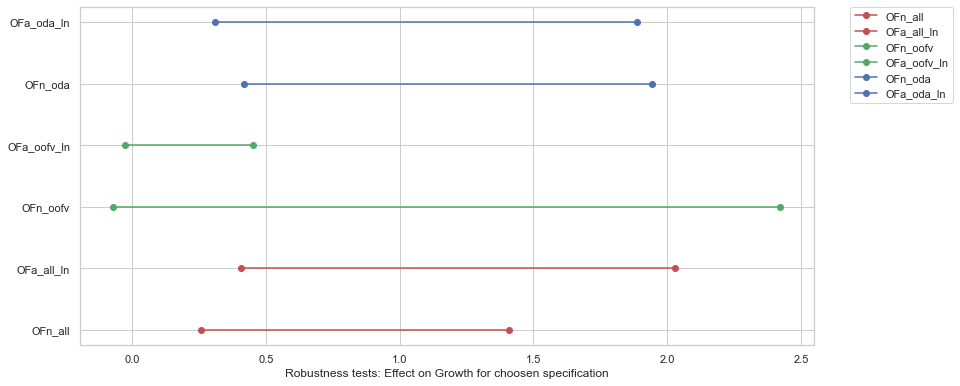

In [40]:
confidence_intervall_plot(effectiveness_data, 0.1, "l2Exports_ln")

##### Specification controlling for Chinese FDI

In [41]:
OFn_OFa_all_Table2_robustness(effectiveness_data, True, ["l2FDI_China_ln"]) #"l2Exports_ln"

                                              Model Comparison                                             
                           SS OFn_all   SS OFn_oofv    SS OFn_oda    SS OFa_all   SS OFa_oofv    SS OFa_oda
-----------------------------------------------------------------------------------------------------------
Dep. Variable               growth_pc     growth_pc     growth_pc     growth_pc     growth_pc     growth_pc
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                  932           932           932           932           932           932
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0272        0.0114        0.0298        0.0102        0.0103        0.0278
R-Squared (Within)            -0.2850       -0.0999       -0.1741       -0.0730       -0.0859       -0.1652
R-Squared (Between)         

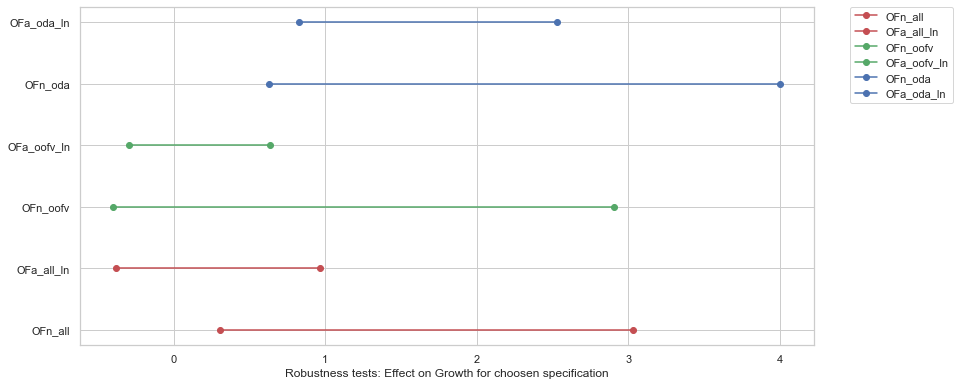

In [42]:
confidence_intervall_plot(effectiveness_data, 0.1, "l2FDI_China_ln")

# 7. Conclusion <a name="section7"></a>

Dreher et al. (2021) offer very detailed, comprehensive and robust insights on the allocation and effects of Chinese development finance and contribute towards closing this paricular gap in the aid literature. The results that I replicated in this notebook as well as my own additional extensions support the findigs of the authors for both the allocation of Chinese development finance and its effect on growth: 

Regarding the allocation of Chinese development finance, China seems to reward countries for their allegiance and mostly uses OOF-like finance, which has mostly a non-development purpose like export promotions. Therefore, China uses the development finance to a large extent for helping itself. The results for the effect of this finance on growth show that Chinese development finance boosts economic growth in the recipient countries in the short run but the data lacks to measure the long runf effects. The results are persistent when looking at the number of projects that a country receives as well at the financial amounts across all project types, but the reuslts are indicating that the growth effect is the highets for ODA-like projects that are consistent with the ODA criterias established by the OECD-DAC.

The 2SLS results (section 6) that I replicate differ with respect to the standard error, but this is mainly due to the fact that I used Python instead of STATA and was not able to find a function for Python that can handle 2SLS for panel data with fixed effects. But despite this difficulties, all my results for section 6 are at least similar and inline with the results of Dreher et al. (2021). In all other sections I was able to replicate the paper precisely. This was possible since the authors provided their STATA code and were transparent and comprehensive in their research. Appart from replicating the paper, I add extension which I marked accordingly: I examine the identification stragey and add both computational and graphical extensions. Since the paper at hand is very thorough and detailed in my opinion, the aim of these extensions mainly is to improve the readers comprehensibillity, therefore I focus on adding graphical extensions to suport the main findings and depicting the results graphically.



 


# 8. References and Literature <a name="section8"></a>

* Strange et al. (2017): AidData's Tracking Underreported Financial Flows (TUFF) Methodology, Version 1.3. Williamsburg, VA: AidData at William & Mary.


* Borenstein et  al. (2009): Introduction to Meta-Analysis. Michael Borenstein, John Wiley & Sons, 2009


* Dreher, Axel, Andreas Fuchs, Bradley Parks, Austin Strange, and Michael J. Tierney. 2021. "Aid, China, and Growth: Evidence from a New Global Development Finance Dataset." American Economic Journal: Economic Policy, 13 (2): 135-74.


* publichealth.columbia.edu (2021): Difference-in-Difference Estimation, online source [https://www.publichealth.columbia.edu/research/population-health-methods/difference-difference-estimation], last access 04.07.2021


* Zhou et al. (2016). Difference-in-Differences Method in Comparative Effectiveness Research: Utility with Unbalanced Groups. Applied health economics and health policy, 14(4), 419–429. https://doi.org/10.1007/s40258-016-0249-y


* Labrecque, J., & Swanson, S. A. (2018). Understanding the Assumptions Underlying Instrumental Variable Analyses: a Brief Review of Falsification Strategies and Related Tools. Current epidemiology reports, 5(3), 214–220. https://doi.org/10.1007/s40471-018-0152-1
